In [1]:
import torch
from torch_geometric.data import Data
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

import numpy as np
import pandas as pd
import networkx as nx

import meshio

In [10]:
mesh_file = "meshes/hole_middle_order1.inp"


csv_file = "data/test_data2.csv"

mesh = meshio.read(mesh_file)
df = pd.read_csv(csv_file, sep=',', skipinitialspace=True)

In [14]:
von_miss = df["Equivalent Stress"].values
node_features = torch.tensor(von_miss, dtype=torch.float).view(-1, 1)
nodes = mesh.points
print(len(nodes))
a = len(nodes)
print(len(node_features[:a]))

5529
5529


In [15]:
edges = []
for cell in mesh.cells:
    if cell.type == "triangle":
        for element in cell.data:
            edges.append([element[0], element[1]])
            edges.append([element[1], element[0]])

            edges.append([element[1], element[2]])
            edges.append([element[2], element[1]])

            edges.append([element[2], element[0]])
            edges.append([element[0], element[2]])

edges = torch.tensor(edges, dtype=torch.long).t().contiguous()
pos = torch.tensor(nodes, dtype=torch.float)

data = Data(x=node_features[:a], edge_index=edges, pos=pos)
print(data.x)
print(data.pos)

tensor([[83749144.],
        [49995064.],
        [49995992.],
        ...,
        [79559056.],
        [31994600.],
        [38777104.]])
tensor([[0.0000, 0.0000, 0.0000],
        [2.0000, 0.0000, 0.0000],
        [2.0000, 1.0000, 0.0000],
        ...,
        [0.9405, 0.6119, 0.0000],
        [0.7702, 0.4725, 0.0000],
        [0.8374, 0.5522, 0.0000]])


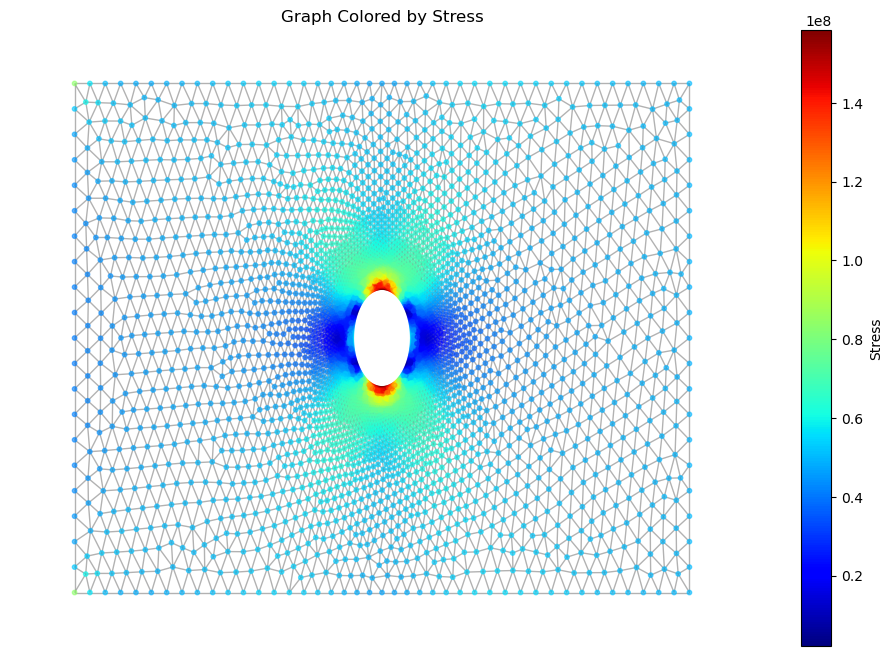

In [17]:
G = to_networkx(data, to_undirected=True)

# Create a position dictionary from data.pos
pos = {i: (data.pos[i, 0].item(), data.pos[i, 1].item()) for i in range(data.pos.shape[0])}

# Extract stress values from your node features (assuming stress is in the first column)
stress_values = data.x[:, 0].numpy()

# Create a figure and axis explicitly
fig, ax = plt.subplots(figsize=(12, 8))

# Draw the graph on the given axis
nx.draw(G, pos, node_size=10, edge_color="gray", alpha=0.6,
        node_color=stress_values, cmap="jet", vmin=stress_values.min(), vmax=stress_values.max(),
        ax=ax)

# Create a mappable and assign the stress values to it for the colorbar
mappable = plt.cm.ScalarMappable(cmap="jet")
mappable.set_array(stress_values)

# Add the colorbar to the figure, using the axis
fig.colorbar(mappable, ax=ax, label="Stress")

ax.set_title("Graph Colored by Stress")
plt.show()

In [8]:
mesh_file = "meshes/hole_middle_order1.inp"

mesh = meshio.read(mesh_file)
print(mesh)

<meshio mesh object>
  Number of points: 5529
  Number of cells:
    line: 42
    line: 20
    line: 42
    line: 20
    line: 238
    triangle: 10696
  Point sets: wall_left, free_bot, force_right, free_top, hole1
  Cell sets: wall_left, free_bot, force_right, free_top, hole1, Line1, Line2, Line3, Line4, Line5, Surface8


In [9]:
nodes = mesh.points
print(nodes[:10, :])

[[0.         0.         0.        ]
 [2.         0.         0.        ]
 [2.         1.         0.        ]
 [0.         1.         0.        ]
 [1.1        0.5        0.        ]
 [0.04993569 0.         0.        ]
 [0.09987139 0.         0.        ]
 [0.14980708 0.         0.        ]
 [0.19974277 0.         0.        ]
 [0.24967847 0.         0.        ]]
